In [1]:
# My Modules
import sys
sys.path.append('../')
from src.utils import *
from src import datahandler, modeltrainer

###### Data tools
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Preprocessing tools
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

##### Measuring models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#from sklearn.ensemble import *
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

In [2]:
ENV = 'local'

if ENV == 'local':
    # Local Jupyter Setup
    PATH='../'
    
    #makesound()

In [3]:
data = pd.read_csv('../OUTPUT/numfeats_qd_noxyz.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,depth_categories
0,1.21,0,4,3.6,63.0,57.0,6134,0.2
1,0.28,2,0,2.5,64.0,56.0,532,0.2
2,0.42,1,2,3.1,61.2,58.0,1103,0.0
3,0.26,0,4,0.0,61.1,57.0,600,0.0
4,1.10,3,3,6.0,63.4,57.0,4997,0.2


# Preparing variables `X` and `y`

In [4]:
Xunprocessed = data.drop(columns='price')
y = data.price

### Quick Visualization

In [5]:
visualize = False
if visualize:
    columns = Xunprocessed.columns   # Use this variable to specify the features to visaualize.
    datahandler.visualize_data(Xunprocessed[columns],y)

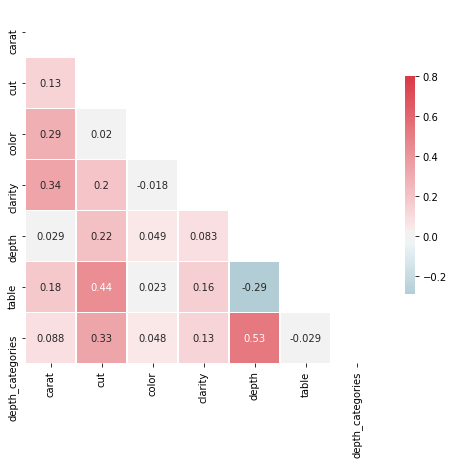

In [6]:
datahandler.corr_matrix(Xunprocessed)

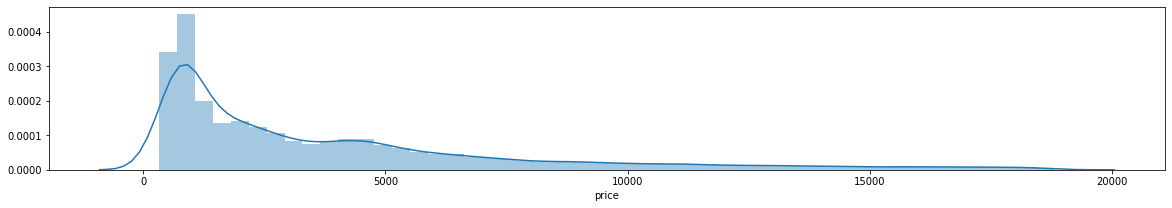

In [7]:
plt.figure(figsize=(20,3))
sns.distplot(y)

# Pre-processing data pipeline

Links to more documentation: 
 - [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)
 - `Estimator class`
     - `myestimator.get_params`

In [8]:
# Feeling lucky?
Lucky = False

# We could check all possible estimators in the sklearn library to transform our data:
if Lucky: display(all_estimators(type_filter='regressor'))

In [9]:
pipelineA = [    StandardScaler()]
pipelineB = [    StandardScaler(),    Normalizer(),]

tr = make_pipeline(*pipelineA)

# We'll use this transformation pipeline for our training, testing, and final predictions
Xprocessed = tr.fit_transform(Xunprocessed)

In [10]:
pd.DataFrame(Xprocessed).head(2)

,0,1,2,3,4,5,6
0,0.880093,-0.982962,0.833658,-0.395673,0.877395,-0.205924,0.930385
1,-1.095267,0.809998,-1.525915,-0.977066,1.579543,-0.653290,0.930385


# Define my models and make a first `cross_val_score` if needed.

Here, consider loading a trained model, using pickle and [this guide](https://scikit-learn.org/stable/modules/model_persistence.html):

In [11]:
#I have defined them in this module
models = modeltrainer.models
models.keys()

dict_keys(['RandomForestRegressor'])

Flip this logic switch to test all the available models in the `modeltrainer` module

 **This check will use both the PROCESSED AND UNPROCESSED X**

In [12]:
recheck_models = False

if recheck_models:
    # Configure the cross_val_score parameters here
    verbose = 2
    cv = 10
    for name, model in models.items():
        try:
            print(f"{'-'*100}\nModel: ({name})")
            scores = cross_val_score(model, Xunprocessed, y,
                                     cv=cv,   verbose=verbose,
                                     scoring='neg_mean_squared_error')
            MSE = abs(np.mean(scores))
            print(f"Model: ({name})> Xunprocessed |   MSE={MSE} \t RMSE={sqrt(MSE)}")
            scores = cross_val_score(model, Xprocessed, y,
                                     cv=cv, verbose=verbose,
                                     scoring='neg_mean_squared_error',
                                     )
            MSE = abs(np.mean(scores))
            print(f"Model: ({name})> Xprocessed   |   MSE={MSE} \t RMSE={sqrt(MSE)}")
        except Exception as e:
            print(f"{'+'*100}\n     {e}")
        
    makesound('coin')

In [13]:
makesound('coin')

# 🔢️  Grid-Search Cross-Validation ♨️

Select a model, and set up a parametrs_grid. Iterate over all the possible mixes of parameters, and save the fitted model 

#### Also consider using `RandomizedSearchCV`

In [14]:
# Select my model
my_model = models['RandomForestRegressor']

In [15]:
parameters_grid = {
    
                   'n_estimators':[100, 500,1000],
                 # 'learning_rate':[0.1],
                 # 'max_bins':[255],
                 # 'max_iter':[86,87,88],
                 # 'max_leaf_nodes':[20],
                 # 'scoring':['neg_root_mean_squared_error'],
                  'random_state':[1]
    
                  }

## Train, test, split

Starting from `Xprocessed`, create 2 groups of X and y 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(Xprocessed, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 7) (8069, 7) (32276,) (8069,)


# Fit my model with GridSearchCV (By using X_train and y_train, we are leveraging on the Xprocessed data we have defined above)

In [17]:
reg = GridSearchCV(my_model, parameters_grid, verbose=2,
                   n_jobs=1,     # How many CPU cores to use
                   cv=5,
                   scoring='neg_mean_squared_error'
                  ).fit(X_train, y_train)

makesound('coin')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=100, random_state=1 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. n_estimators=100, random_state=1, total=   8.4s
[CV] n_estimators=100, random_state=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] ................. n_estimators=100, random_state=1, total=   9.3s
[CV] n_estimators=100, random_state=1 ................................
[CV] ................. n_estimators=100, random_state=1, total=   8.3s
[CV] n_estimators=100, random_state=1 ................................
[CV] ................. n_estimators=100, random_state=1, total=   8.4s
[CV] n_estimators=100, random_state=1 ................................
[CV] ................. n_estimators=100, random_state=1, total=   7.6s
[CV] n_estimators=500, random_state=1 ................................
[CV] ................. n_estimators=500, random_state=1, total=  37.9s
[CV] n_estimators=500, random_state=1 ................................
[CV] ................. n_estimators=500, random_state=1, total=  38.1s
[CV] n_estimators=500, random_state=1 ................................
[CV] ................. n_estimators=500, random_state=1, total=  42.6s
[CV] n_estimators=500, random_state=1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.8min finished


    The following is our best estimator model, according to the crossvalidation process we just ran!

In [18]:
reg.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [19]:
reg.best_params_

{'n_estimators': 1000, 'random_state': 1}

# Compare the GROUND TRUTH with our predicted `ŷ_test`

#### I can use my fitted model to predict the `label` (`ŷ`) on any given set of `X` values
 In this case, I want to predict the section of my `train_data` which my model has never seen (the `X_test`)

In [20]:
my_pred = reg.predict(X_test)
my_pred.shape

(8069,)

## Measure RMSE

In [21]:
RMSE = sqrt(mean_squared_error(y_test,  my_pred))
print(f'Current score: {RMSE}    \n  Highest score: {modeltrainer.highest_score}')

if RMSE < modeltrainer.highest_score:
    new_high_score()
else:
    makesound('error')
    raise Exception('The model has a low score, go back and try to get a lower RMSE.')

Current score: 553.915307143563    
  Highest score: 530


Exception: The model has a low score, go back and try to get a lower RMSE.

    """
    Just some notes:
    model:VotingRegressor estimator with RandomForestRegressor and HistGradientBoostingRegressor we get a RMSE of: 

        data: numfeats_qd
            - pipelineA:   589
            - pipelineB:   561

        data: numfeats_qd_noxyz
            - pipelineA:   518
            - pipelineB:   565
    """

In [ ]:
reg_refit = reg.fit(Xprocessed, y)

In [ ]:
reg_refit.best_estimator_

# We're ready for KAGGLE: 
#### Let's train again the model, but using all the X data, before sending a prediction to kaggle

- Beware, of what `X` features you will use to train this time; is it `Xprocessed` or `Xunprocessed` ?

In [ ]:
# Fitting
reg = GridSearchCV(my_model, parameters_grid, verbose=2,
                   scoring='neg_mean_squared_error'
                  ).fit(Xprocessed, y)
makesound('coin')

In [ ]:
# Test the model with the train data, RMSE should be very low
just_checking = reg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test,  just_checking))
print(f'Current score: {RMSE}    \n  Highest score: {modeltrainer.highest_score}')

# Take this new regression model, and use it to predict the values of `y` in the kaggle dataset

In [ ]:
X_competition = pd.read_csv(f'../INPUT/diamonds_test.csv')#.drop(columns='Unnamed: 0')
X_competition.head(3)

### Reuse my data processing pipeline to make this `test data` look like the data I fitted my model with


In [ ]:
X_competition_processed = datahandler.use_my_numeric_scales(X_competition)
X_competition_processed['depth_categories'] = X_competition_processed.depth
X_competition_processed['depth_categories'] = X_competition_processed.depth_categories.apply(datahandler.depth_qualifyer)

if True: raise Exception('Be careful, what type of columsn are you going to drop ?')

to_drop = ["Unnamed: 0", 'x', 'y', 'z']
X_competition_processed.drop(columns=to_drop, inplace=True)
X_competition_processed.head(3)

In [ ]:
Xprocessed = tr.fit_transform(X_competition_processed)
Xprocessed

In [ ]:
reg.best_estimator_

In [ ]:
my_prediction = reg.predict(X_competition_processed)

In [ ]:
df = pd.DataFrame(my_prediction)
df = df.reset_index()
df.columns = ['id', 'price']
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv(f'../OUTPUT/my_prediction.csv', columns=['id','price'], index_label=False,index=False)